In [8]:
import matplotlib.pyplot as plt
import glob
import re
import os
from Bio import PDB
from Bio.PDB.PDBIO import PDBIO
from Bio.PDB.StructureBuilder import StructureBuilder
import MDAnalysis as mda
import numpy as np

### First convert AF3 models from CIF to PDB

In [3]:
# AF3 models are stored in AF3_models directory as cif files
AF3_models=glob.glob("AF3_models*/*.cif")
# convert to PDB
for f in AF3_models:
    # get PDB file name
    fpdb=re.sub(".cif",".pdb",f)
    # convert to PDB
    parser = PDB.MMCIFParser()
    structure = parser.get_structure(structure_id="PDB", filename=f)
    io=PDBIO()
    io.set_structure(structure)
    io.save(fpdb)

### run FoldX on AF3 models

In [14]:
# extract binding energy from FoldX output
def get_binding(m, f):
    for lines in open(f, "r").readlines():
        r = lines.strip().split()
        if(len(r)>0 and r[0]==m): be = float(r[5])
    return be
# location of foldx binary
foldx_="/Users/max/bin/foldx5_1Mac_0/foldx_20241231"
# binding energy dictionary
be = {}
# AF3 models in pdb FORMAT
m=glob.glob("AF3_models*/*.pdb")
# run FoldX
for m in AF3_models:
    # get directory
    d = m.split("/")[0]
    # get filename
    f = m.split("/")[1]
    # clean directory
    os.system("cd "+d+"; rm Indiv_* Inter* Summary_*; cd ../")
    # run command- assuming viral protein chain A, antibody chain B and C
    os.system(foldx_+" --command=AnalyseComplex --pdb="+f+" --analyseComplexChains=A,BC --complexWithDNA=false --output-file=foldX_out clean-mode --pdb-dir="+d+" --output-dir="+d)
    # extract binding energy
    be[m] = get_binding(m, d+"/Summary_foldX_out_AC.fxout")

   ********************************************
   ***                                      ***
   ***             FoldX 5.1 (c)            ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

Start FoldX AnalyseComplex >>>

1 models read: fold_banal_7cwl_model_2.pdb
RUNNING COMPLEX ANALYSIS
AF3_models_Fab-P17/fold_banal_7cwl_model_2.pdb

BackHbond       =               -931.72
SideHbond       =               -238.23
Energy_VdW      =               -1436.35
Electro   

### Bar plot with binding energy

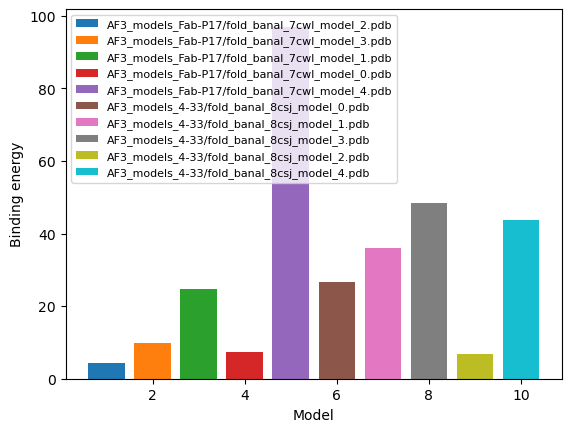

In [22]:
# make bar plot
fig, ax = plt.subplots()
# loop over models
for i,m in enumerate(AF3_models):
    ax.bar([i+1], [be[m]], label=m)

ax.set_xlabel('Model')
ax.set_ylabel('Binding energy')
ax.legend(loc="upper left", fontsize=8, ncol=1)
plt.show()